In [13]:
import pandas as pd

df = pd.read_csv(r'C:\Users\jmcde\OneDrive\Desktop\vscode-projects\Netflix-shows-movies\netflix_titles.csv')



In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [15]:
import pandas as pd

# Replace with your actual file path:
file_path = r'C:\Users\jmcde\OneDrive\Desktop\vscode-projects\Netflix-shows-movies\netflix_titles.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Show the first 5 rows to confirm it loaded successfully
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [16]:
# Check how many missing values are in each column
print("Missing values per column:")
print(df.isnull().sum())

# Convert 'date_added' to datetime (some values might be missing so we coerce errors)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing directors with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

# Split the 'listed_in' genres into a list (if not null)
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

# Select relevant columns only for easier handling
columns_to_keep = ['show_id', 'type', 'title', 'director', 'cast', 'country', 
                   'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

df_clean = df[columns_to_keep]

# Check the cleaned data
print(df_clean.head())


Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                Na

In [17]:
df_clean.to_csv('netflix_cleaned.csv', index=False)
print("Cleaned data saved to netflix_cleaned.csv")


Cleaned data saved to netflix_cleaned.csv


In [18]:
import pandas as pd

def extract(file_path):
    return pd.read_csv(file_path)

def transform(df):
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['director'] = df['director'].fillna('Unknown')
    df['listed_in'] = df['listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
    columns_to_keep = ['show_id', 'type', 'title', 'director', 'cast', 'country',
                       'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
    return df[columns_to_keep]

def load(df, output_file='netflix_cleaned.csv'):
    df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to {output_file}")

def etl_process(input_file):
    df_raw = extract(input_file)
    df_clean = transform(df_raw)
    load(df_clean)

if __name__ == "__main__":
    input_path = r'C:\Users\jmcde\OneDrive\Desktop\vscode-projects\Netflix-shows-movies\netflix_titles.csv'
    etl_process(input_path)


Cleaned data saved to netflix_cleaned.csv


In [19]:
def transform(df):
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['director'] = df['director'].fillna('Unknown')
    df['listed_in'] = df['listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

    # Validation checks
    if df['title'].isnull().any():
        raise ValueError("Validation Error: Missing values found in 'title' column!")
    if df['type'].isnull().any():
        raise ValueError("Validation Error: Missing values found in 'type' column!")
    if (df['release_year'] > 2025).any():
        raise ValueError("Validation Error: Future release_year found!")
    if df['date_added'].isnull().all():
        raise ValueError("Validation Error: All 'date_added' values are missing or invalid!")

    columns_to_keep = ['show_id', 'type', 'title', 'director', 'cast', 'country',
                       'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
    return df[columns_to_keep]


In [20]:
import pandas as pd
import logging

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("etl_netflix.log"),  # Save logs to this file
        logging.StreamHandler()                   # Also print logs to console
    ]
)

def extract(file_path):
    logging.info(f"Starting extraction from {file_path}")
    df = pd.read_csv(file_path)
    logging.info(f"Extracted {len(df)} rows")
    return df

def transform(df):
    logging.info("Starting transformation")
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['director'] = df['director'].fillna('Unknown')
    df['listed_in'] = df['listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

    # Validation checks
    if df['title'].isnull().any():
        logging.error("Validation Error: Missing values found in 'title' column!")
        raise ValueError("Missing values found in 'title' column!")
    if df['type'].isnull().any():
        logging.error("Validation Error: Missing values found in 'type' column!")
        raise ValueError("Missing values found in 'type' column!")
    if (df['release_year'] > 2025).any():
        logging.error("Validation Error: Future release_year found!")
        raise ValueError("Future release_year found!")
    if df['date_added'].isnull().all():
        logging.error("Validation Error: All 'date_added' values are missing or invalid!")
        raise ValueError("All 'date_added' values are missing or invalid!")

    columns_to_keep = ['show_id', 'type', 'title', 'director', 'cast', 'country',
                       'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
    logging.info("Transformation complete")
    return df[columns_to_keep]

def load(df, output_file='netflix_cleaned.csv'):
    logging.info(f"Starting loading data to {output_file}")
    df.to_csv(output_file, index=False)
    logging.info("Loading complete")

def etl_process(input_file):
    try:
        df_raw = extract(input_file)
        df_clean = transform(df_raw)
        load(df_clean)
        logging.info("ETL process completed successfully!")
    except Exception as e:
        logging.error(f"ETL process failed: {e}")

if __name__ == "__main__":
    input_path = r'C:\Users\jmcde\OneDrive\Desktop\vscode-projects\Netflix-shows-movies\netflix_titles.csv'
    etl_process(input_path)


2025-06-13 15:18:36,607 - INFO - Starting extraction from C:\Users\jmcde\OneDrive\Desktop\vscode-projects\Netflix-shows-movies\netflix_titles.csv
2025-06-13 15:18:36,641 - INFO - Extracted 8807 rows
2025-06-13 15:18:36,641 - INFO - Starting transformation
2025-06-13 15:18:36,653 - INFO - Transformation complete
2025-06-13 15:18:36,655 - INFO - Starting loading data to netflix_cleaned.csv
2025-06-13 15:18:36,711 - INFO - Loading complete
2025-06-13 15:18:36,712 - INFO - ETL process completed successfully!


In [21]:
def validate_data_quality(df):
    logging.info("Starting extended data validation")

    # Summary of missing values per column
    missing = df.isnull().sum()
    logging.info(f"Missing values per column:\n{missing}")

    # Check for duplicates by show_id
    duplicates = df.duplicated(subset=['show_id']).sum()
    logging.info(f"Number of duplicate show_id entries: {duplicates}")

    # Check unique counts for categorical columns
    for col in ['type', 'rating']:
        unique_vals = df[col].nunique()
        logging.info(f"Unique values in '{col}': {unique_vals}")

    # Release year range
    min_year = df['release_year'].min()
    max_year = df['release_year'].max()
    logging.info(f"Release year range: {min_year} - {max_year}")

    logging.info("Extended validation completed")

# Then call this in etl_process after transform:
def etl_process(input_file):
    try:
        df_raw = extract(input_file)
        df_clean = transform(df_raw)
        validate_data_quality(df_clean)  # <-- call it here
        load(df_clean)
        logging.info("ETL process completed successfully!")
    except Exception as e:
        logging.error(f"ETL process failed: {e}")


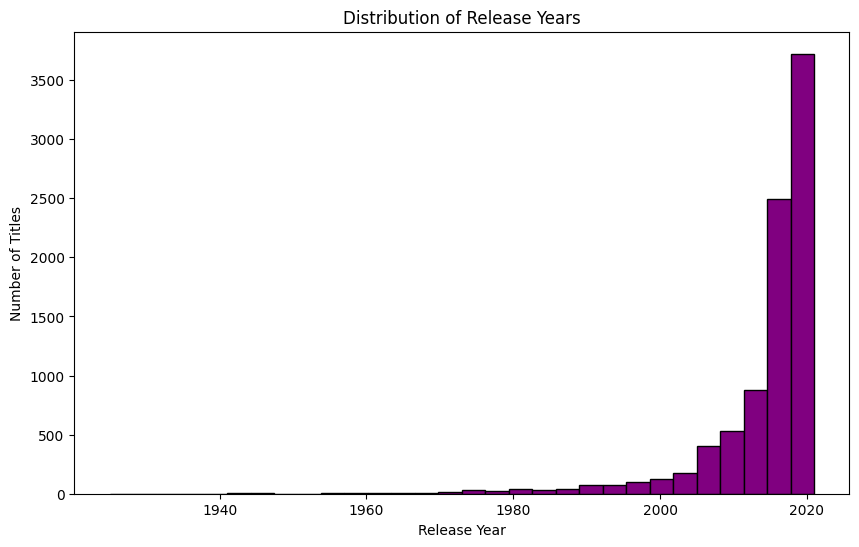

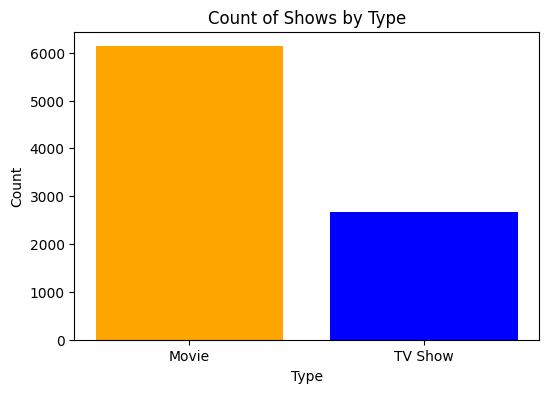

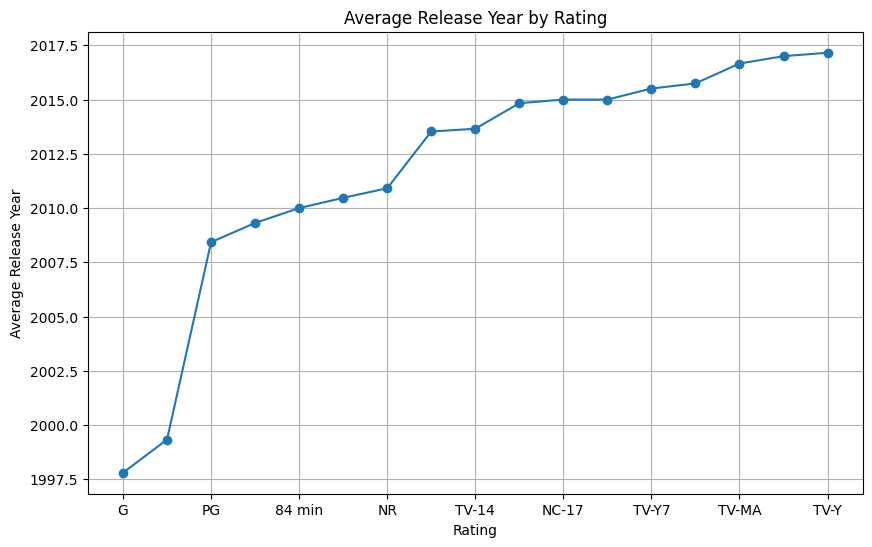

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned Netflix data
df = pd.read_csv('netflix_cleaned.csv')

# Histogram: Distribution of release years
plt.figure(figsize=(10,6))
plt.hist(df['release_year'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

# Bar chart: Count of shows by type (Movie vs TV Show)
plt.figure(figsize=(6,4))
type_counts = df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values, color=['orange', 'blue'])
plt.title('Count of Shows by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Line plot: Average release year by rating (just an example)
avg_release_by_rating = df.groupby('rating')['release_year'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_release_by_rating.plot(kind='line', marker='o')
plt.title('Average Release Year by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Release Year')
plt.grid(True)
plt.show()


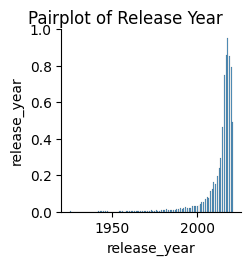

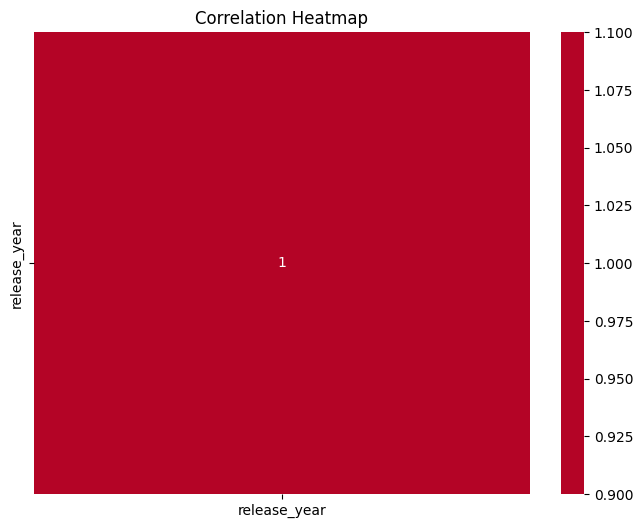

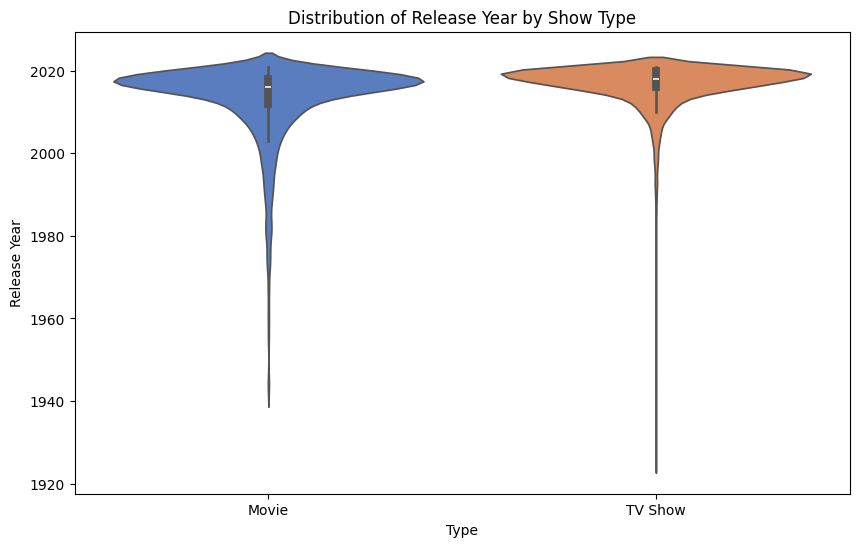

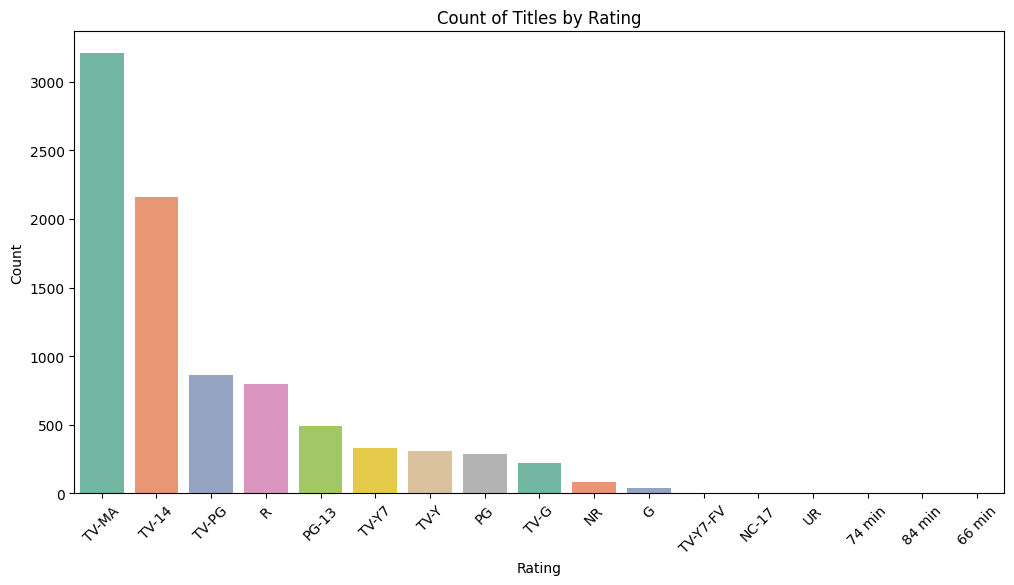

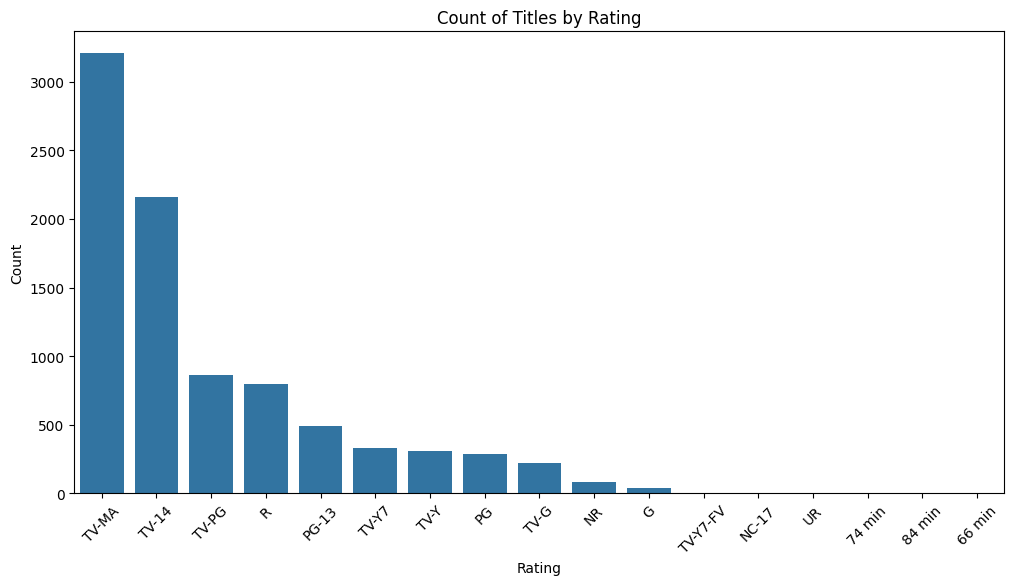

<Axes: xlabel='type', ylabel='release_year'>

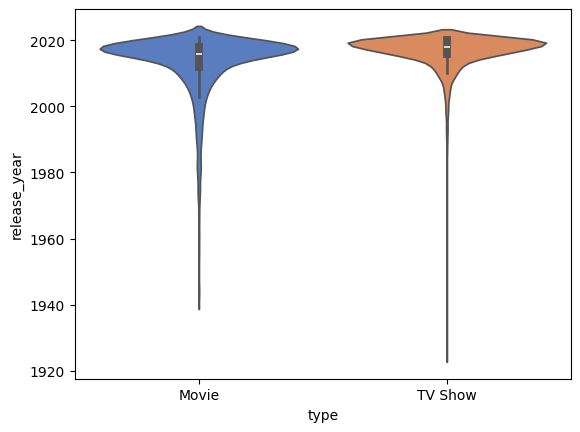

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv('netflix_cleaned.csv')

# 1. Pair plot (scatterplot matrix) of numerical variables
sns.pairplot(df[['release_year']])  # Only one numeric here but good example
plt.suptitle('Pairplot of Release Year', y=1.02)
plt.show()

# 2. Heatmap of correlations (if you had more numeric columns, but here limited)
# Let's create correlation matrix (only numeric columns)
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 3. Violin plot of release year by type
plt.figure(figsize=(10,6))
sns.violinplot(x='type', y='release_year', data=df, palette='muted')
plt.title('Distribution of Release Year by Show Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

# 4. Count plot of ratings (show count per rating category)
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Count of Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

sns.violinplot(x='type', y='release_year', data=df, hue='type', palette='muted', legend=False)


In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'C:\Users\jmcde\OneDrive\Desktop\vscode-projects\Netflix-shows-movies\netflix_titles.csv')

# Count titles by type, naming columns explicitly as 'type' and 'count'
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']  # Rename columns

# Create bar chart
fig = px.bar(
    type_counts,
    x='type',
    y='count',
    labels={'type': 'Type', 'count': 'Number of Titles'},
    title='Number of Netflix Titles by Type'
)

fig.show()


In [2]:
fig = px.pie(
    df,
    names='rating',
    title='Distribution of Netflix Titles by Rating',
    hole=0.3  # makes it a donut chart for style
)
fig.show()


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

fig = px.histogram(
    df,
    x='year_added',
    nbins=15,
    title='Number of Titles Added Per Year',
    labels={'year_added': 'Year Added'}
)
fig.show()


In [14]:
import plotly.express as px

movies = df[df['type'] == 'Movie'].copy()

# Extract numbers from the 'duration' column into 'duration_num'
movies['duration_num'] = movies['duration'].str.extract(r'(\d+)')

# Now fill missing values and convert to int
movies['duration_num'] = movies['duration_num'].fillna('0').astype(int)

# Then create your plot as before
fig = px.scatter(
    movies,
    x='release_year',
    y='duration_num',
    color='rating',
    labels={'duration_num': 'Duration (minutes)', 'release_year': 'Release Year'},
    title='Movie Duration vs Release Year by Rating',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()


In [15]:
import plotly.express as px

# Assuming you have this DataFrame ready (movies with duration_num column)
fig = px.scatter(
    movies,
    x='release_year',
    y='duration_num',
    color='rating',
    size='duration_num',
    hover_name='title',
    title='Movie Duration vs Release Year by Rating',
    labels={
        'release_year': 'Release Year',
        'duration_num': 'Duration (minutes)',
        'rating': 'Rating'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Customize layout
fig.update_layout(
    title={
        'text': "Movie Duration vs Release Year by Rating<br><sup>Data from Netflix Titles Dataset</sup>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='darkblue')
    },
    legend_title_text='Rating Categories',
    legend=dict(
        title_font_family="Arial",
        font=dict(size=12),
        bgcolor='LightSteelBlue',
        bordercolor='Black',
        borderwidth=1
    ),
    plot_bgcolor='whitesmoke',
    xaxis=dict(
        title='Release Year',
        tickangle=45
    ),
    yaxis=dict(
        title='Duration (minutes)'
    )
)

# Add an annotation example (highlight a specific movie)
fig.add_annotation(
    x=2010,
    y=120,
    text="Popular movie here!",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

fig.show()


In [16]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Check data types
print("\nData types:")
print(df.dtypes)

# 3. Unique values in key categorical columns
print("\nUnique 'type' values:", df['type'].unique())
print("Unique 'rating' values:", df['rating'].unique())

# 4. Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 5. Spot check outliers for duration_num (if exists)
if 'duration_num' in df.columns:
    print("\nDuration stats:")
    print(df['duration_num'].describe())
    # Check for negative or zero durations
    print("Rows with zero or negative duration:")
    print(df[df['duration_num'] <= 0])


Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        98
dtype: int64

Data types:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
dtype: object

Unique 'type' values: ['Movie' 'TV Show']
Unique 'rating' values: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']

Number of duplicate rows: 0


In [17]:
import pandas as pd

# First, check which 'rating' values look like durations (e.g. '74 min')
duration_ratings = df['rating'].str.contains(r'^\d+\s*min$', na=False)
print("Rows with duration in 'rating':")
print(df[duration_ratings][['rating', 'duration']])

# Move these duration-like 'rating' values into the 'duration' column if 'duration' is missing there
df.loc[duration_ratings & df['duration'].isna(), 'duration'] = df.loc[duration_ratings & df['duration'].isna(), 'rating']

# Set those 'rating' values to NaN since they don't belong there
df.loc[duration_ratings, 'rating'] = pd.NA


Rows with duration in 'rating':
      rating duration
5541  74 min      NaN
5794  84 min      NaN
5813  66 min      NaN


In [19]:
# Fill missing 'rating' with 'NR' (Not Rated)
df['rating'] = df['rating'].fillna('NR')

# Fill missing 'director' and 'cast' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Fill missing 'country' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# For missing 'date_added' and 'year_added', fill year_added if date_added exists
df['year_added'] = df.apply(
    lambda row: row['date_added'].year if pd.notna(row['date_added']) and pd.isna(row['year_added']) else row['year_added'],
    axis=1
)

# For missing 'duration' (very few), you could fill with median duration after extracting numbers (next step)


In [20]:
# Extract numbers from duration column
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Fill missing duration_num with median duration_num
median_duration = df['duration_num'].median()
df['duration_num'] = df['duration_num'].fillna(median_duration)
